In [1]:
!pip install wfdb

#https://physionet.org/content/mitdb/1.0.0/


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 160.0/160.0 kB 504.1 kB/s eta 0:00:00


In [2]:
import wfdb
wfdb.io.dl_database('mitdb', './mitdb', records='all', annotators='all', keep_subdirs=True, overwrite=False)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [3]:
!pip install padasip



[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51662 sha256=e11ef436d7ed0b46f5cf7a0313eb13363c425f9f4c36966e919433f5948a8f68
  Stored in directory: c:\users\joaco\appdata\local\pip\cache\wheels\a0\bb\e7\b57f417dbad7d85dbcb177f2c185543ca34a1b36541f115e95
Successfully built padasip


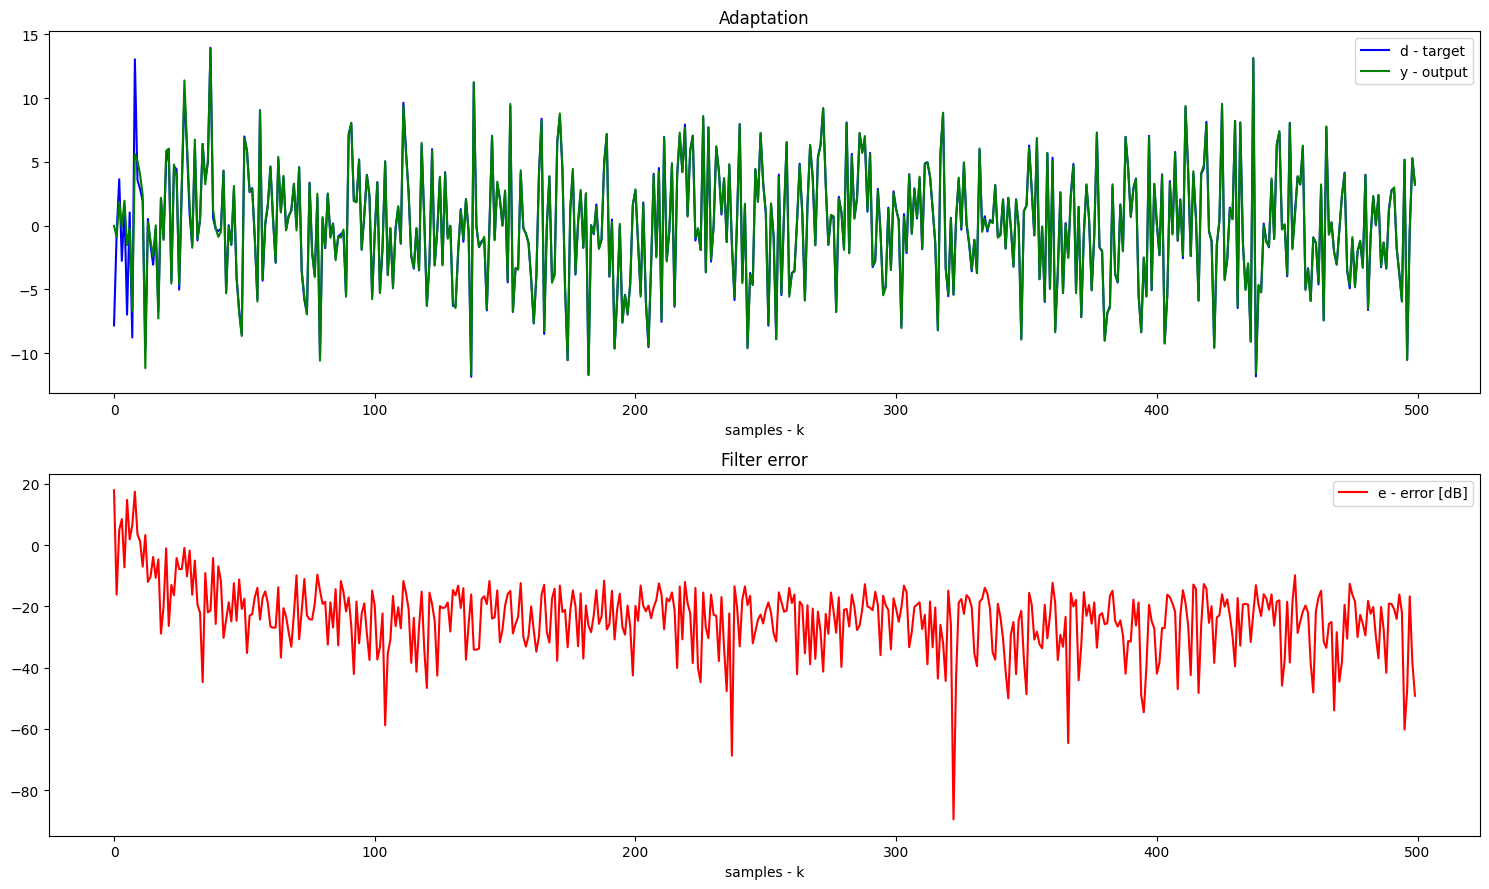

In [4]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

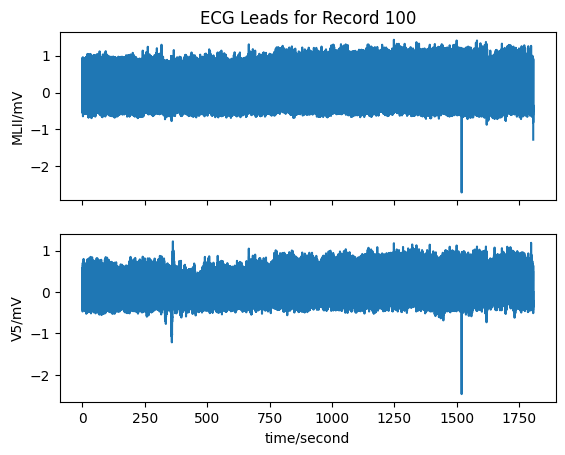

Record Name: 100
Number of Leads: 2
Sampling Frequency: 360 Hz
Record Duration: 1805.5555555555557 seconds
Lead Names: ['MLII', 'V5']


In [5]:
import wfdb
import matplotlib.pyplot as plt

# Load the ECG record from the MIT-BIH Arrhythmia Database
record_name = '100'  # Change this to the desired record name
record = wfdb.rdrecord(record_name, pn_dir='mitdb')

# Plot the ECG leads
wfdb.plot_wfdb(record=record, title=f'ECG Leads for Record {record_name}')
plt.show()

# Print additional information about the ECG record
record_info = wfdb.rdheader(record_name, pn_dir='mitdb')

print(f"Record Name: {record_info.record_name}")
print(f"Number of Leads: {record_info.n_sig}")
print(f"Sampling Frequency: {record_info.fs} Hz")
print(f"Record Duration: {record_info.sig_len / record_info.fs} seconds")
print(f"Lead Names: {record_info.sig_name}")

# You can access more information from the record_info object as needed.

In [6]:
for attr_name, attr_value in record_info.__dict__.items():
    print(f"{attr_name}: {attr_value}")

record_name: 100
n_sig: 2
fs: 360
counter_freq: None
base_counter: None
sig_len: 650000
base_time: None
base_date: None
comments: ['69 M 1085 1629 x1', 'Aldomet, Inderal']
sig_name: ['MLII', 'V5']
p_signal: None
d_signal: None
e_p_signal: None
e_d_signal: None
file_name: ['100.dat', '100.dat']
fmt: ['212', '212']
samps_per_frame: [1, 1]
skew: [None, None]
byte_offset: [None, None]
adc_gain: [200.0, 200.0]
baseline: [1024, 1024]
units: ['mV', 'mV']
adc_res: [11, 11]
adc_zero: [1024, 1024]
init_value: [995, 1011]
checksum: [-22131, 20052]
block_size: [0, 0]


In [7]:
# Extract ECG data from two leads as numpy arrays
lead1_data = record.p_signal[:, 0]  # First lead
lead2_data = record.p_signal[:, 1]  # Second lead

In [114]:
def filter_with_LMS(in_sig, desired_sig, n = 1, m = 0.01):
    # creation of data
    N = len(in_sig)
    filt_size =  n
    x = pa.input_from_history(in_sig,filt_size)
    d = desired_sig.reshape(len(desired_sig), 1)
    d = d[:N-filt_size+1, 0]

    print(x.shape, d.shape)
    f = pa.filters.FilterLMS(n=filt_size, mu=m, w="zeros")
    y, e, w = f.run(d, x)
    return y, e    


In [151]:
from ecgdetectors import Detectors

def detect_r_peak(sig):
    detectors = Detectors(360)
    r_peaks = np.array(detectors.christov_detector(sig))
    deltas = np.zeros(len(sig))
    deltas[r_peaks] = 1

    return deltas

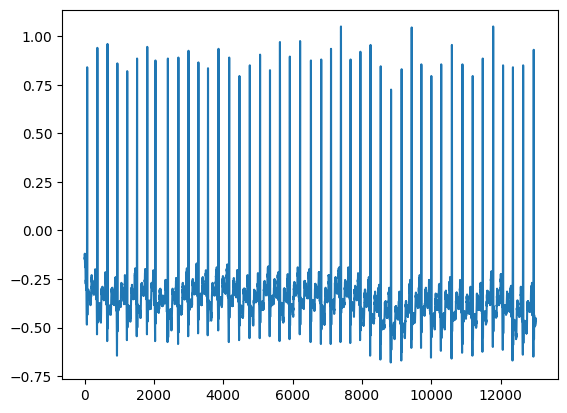

In [165]:
plt.plot(lead1_data[:len(lead1_data)//50])

(12991, 10) (12991,)


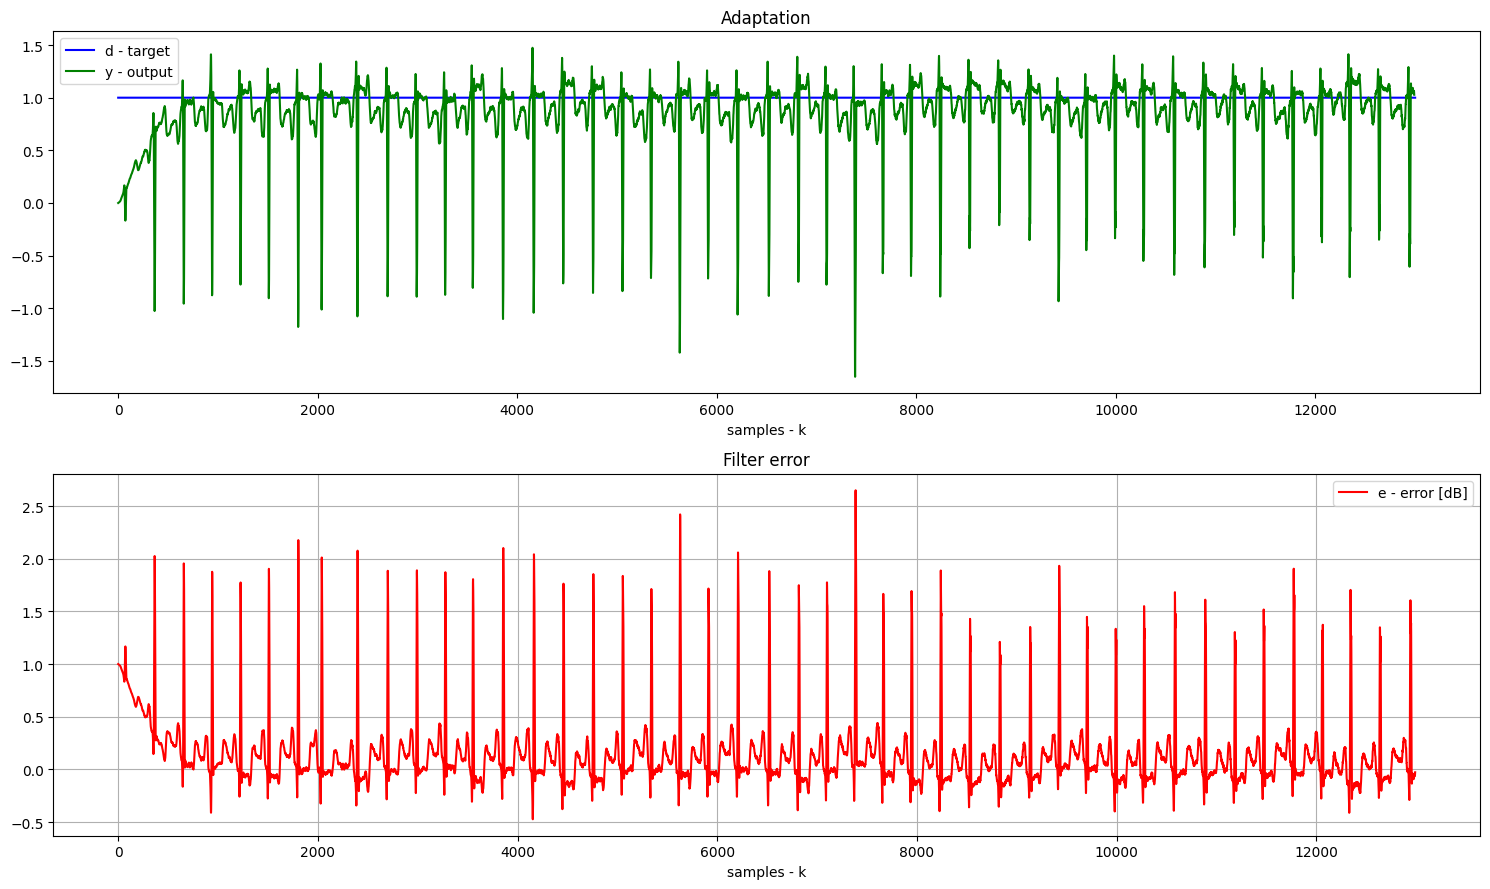

In [152]:
# creation of data
N = len(lead1_data)//50
filt_size = 10
x = lead1_data[:N]
d = np.ones(len(x))

y, e = filter_with_LMS(x, d, n = filt_size, m = 0.003)

filtered_sig = e

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

(12792, 200) (12792,)


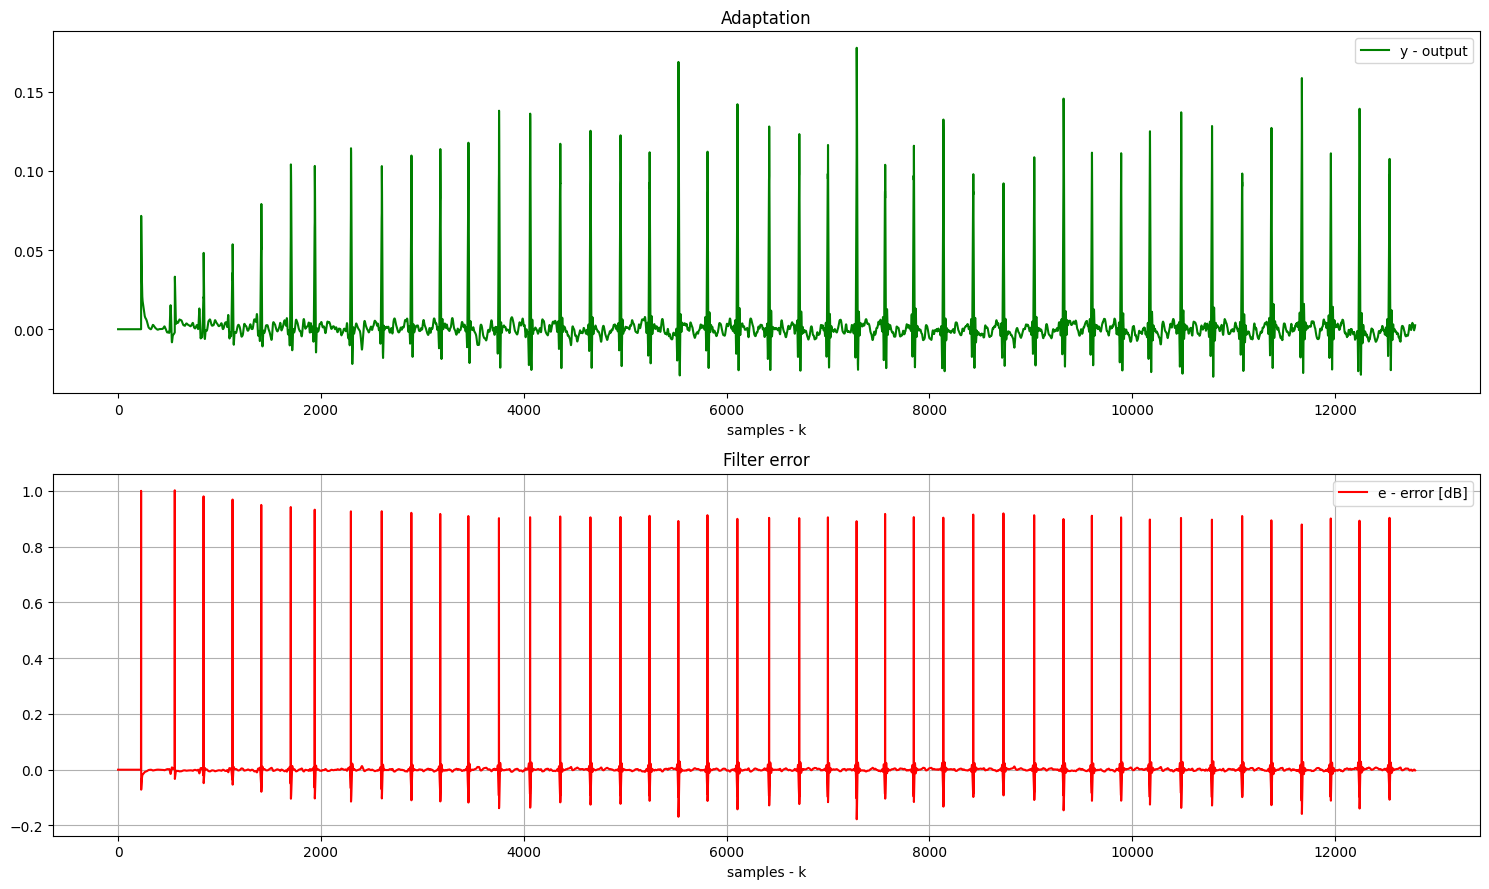

In [176]:

filt_size = 200
x = filtered_sig
deltas = detect_r_peak(x)
deltas = np.concatenate((deltas, np.zeros(100)))[100:]


y, e = filter_with_LMS(x, deltas, n = filt_size, m = 0.001)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e,"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.grid()
plt.show()